In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_categorize

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()
df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

categorizing age feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1441
           1       0.82      0.92      0.87      1413

    accuracy                           0.86      2854
   macro avg       0.87      0.86      0.86      2854
weighted avg       0.87      0.86      0.86      2854

Node Labels:
 Annotation(0.586285, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


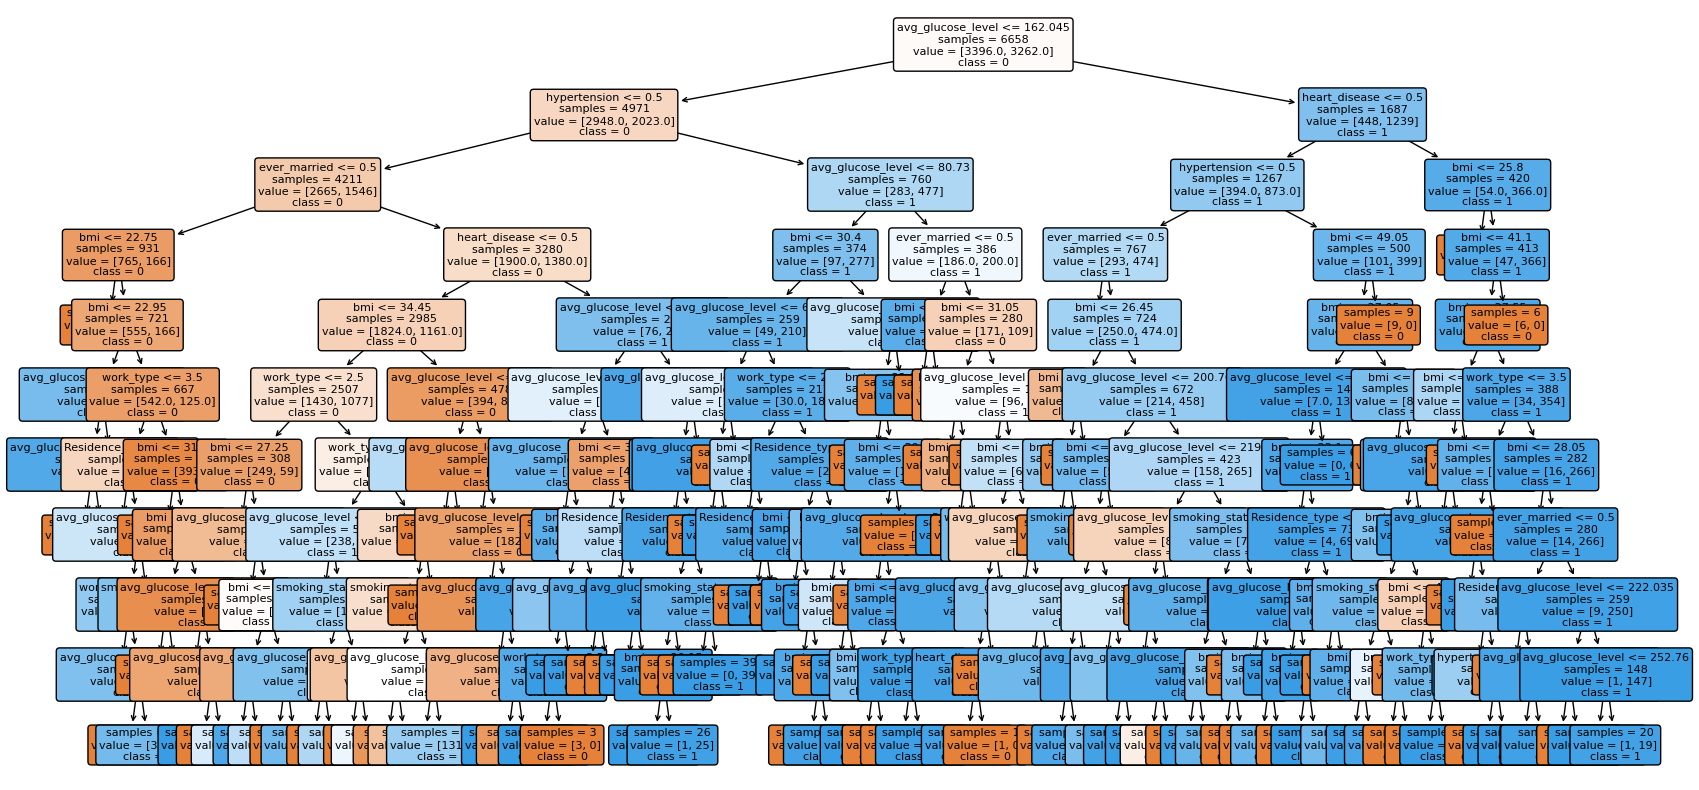

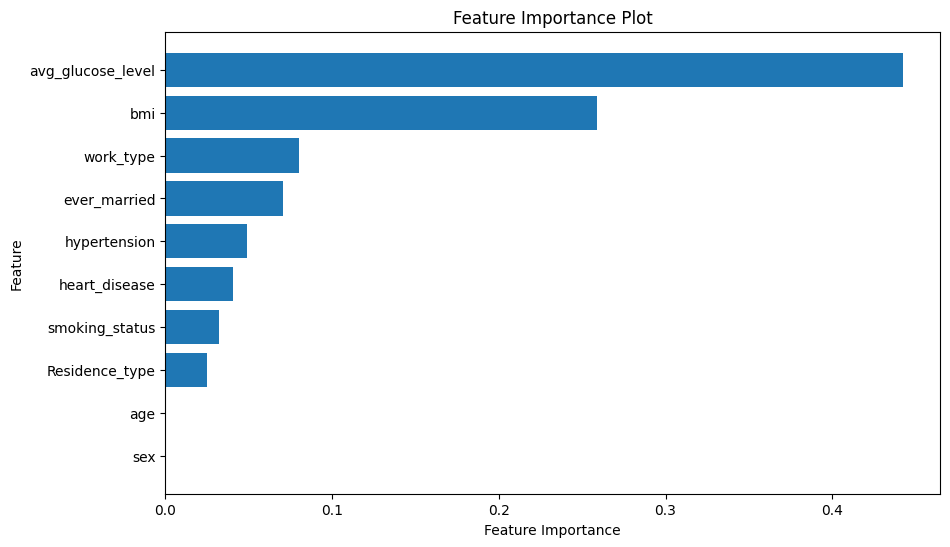

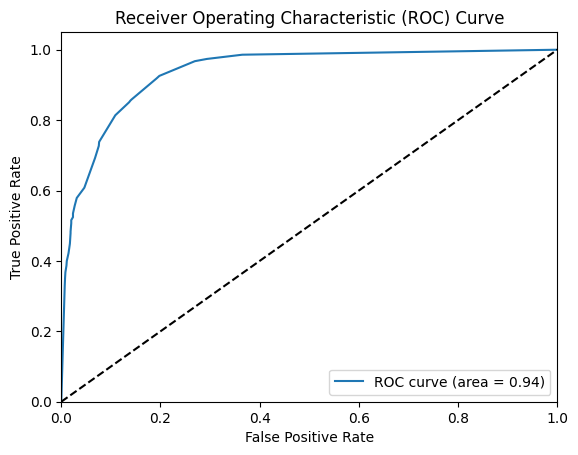

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9361335924519666
Accuracy for each fold: [0.7482517482517482, 0.8181818181818182, 0.8076923076923077, 0.7902097902097902, 0.8315789473684211, 0.7964912280701755, 0.8, 0.8210526315789474, 0.8385964912280702, 0.8350877192982457]
Mean accuracy: 0.8087142681879526
95% confidence interval: (0.789375085190465, 0.8280534511854402)


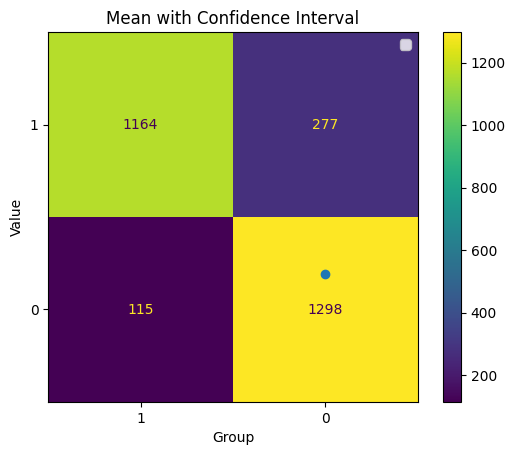


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1441
           1       0.50      1.00      0.66      1413

    accuracy                           0.50      2854
   macro avg       0.25      0.50      0.33      2854
weighted avg       0.25      0.50      0.33      2854



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

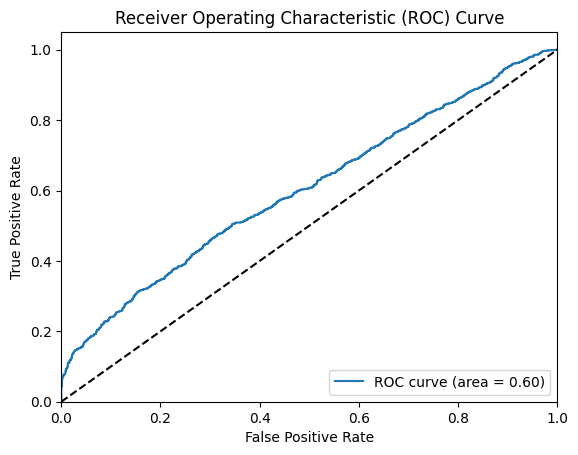

AUC Score: 0.6035480000569707


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6433566433566433, 0.5979020979020979, 0.7237762237762237, 0.6538461538461539, 0.6491228070175439, 0.7263157894736842, 0.6631578947368421, 0.6491228070175439, 0.6526315789473685, 0.6771929824561403]
Mean accuracy: 0.6636424978530242
95% confidence interval: (0.6363503588585118, 0.6909346368475366)


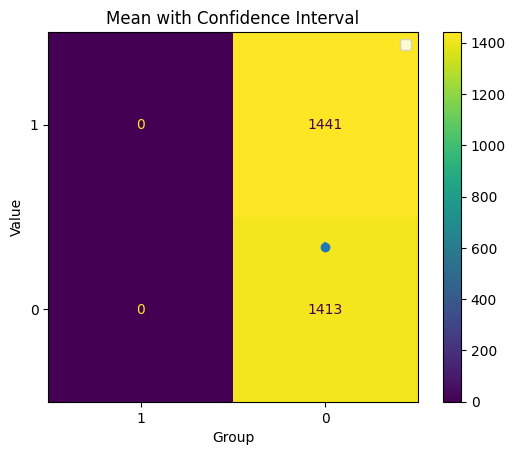

In [2]:
original_continuous_column = df['age'].copy()
df = util_categorize.categorize_age(df)
df = util_categorize.label_encoding(df,'age')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['age'] = original_continuous_column

Categorizing bmi feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1441
           1       0.82      0.76      0.79      1413

    accuracy                           0.80      2854
   macro avg       0.80      0.80      0.80      2854
weighted avg       0.80      0.80      0.80      2854

Node Labels:
 Annotation(0.641348, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


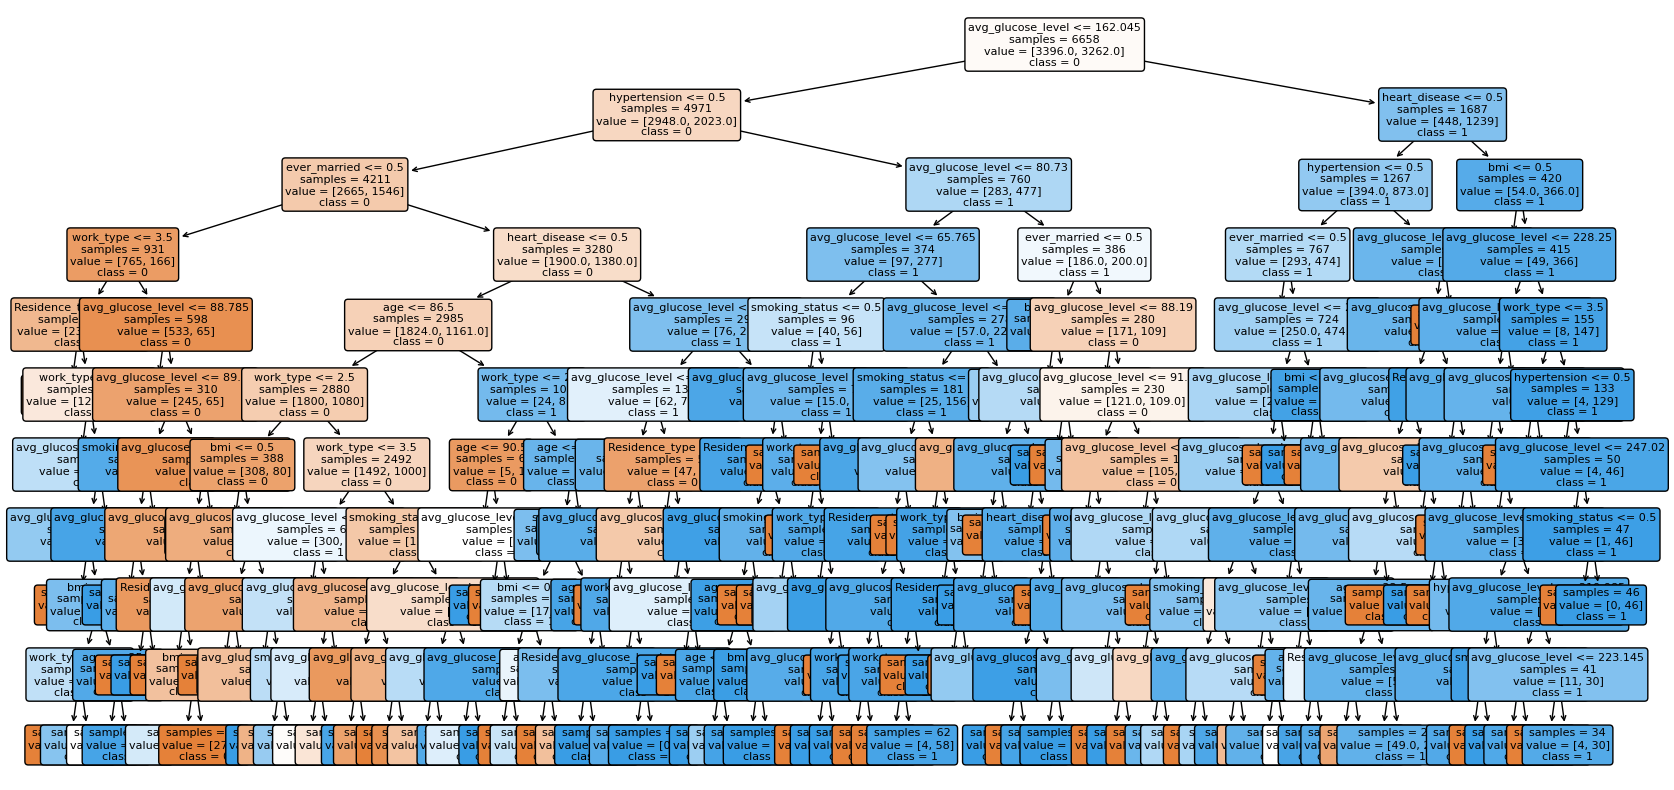

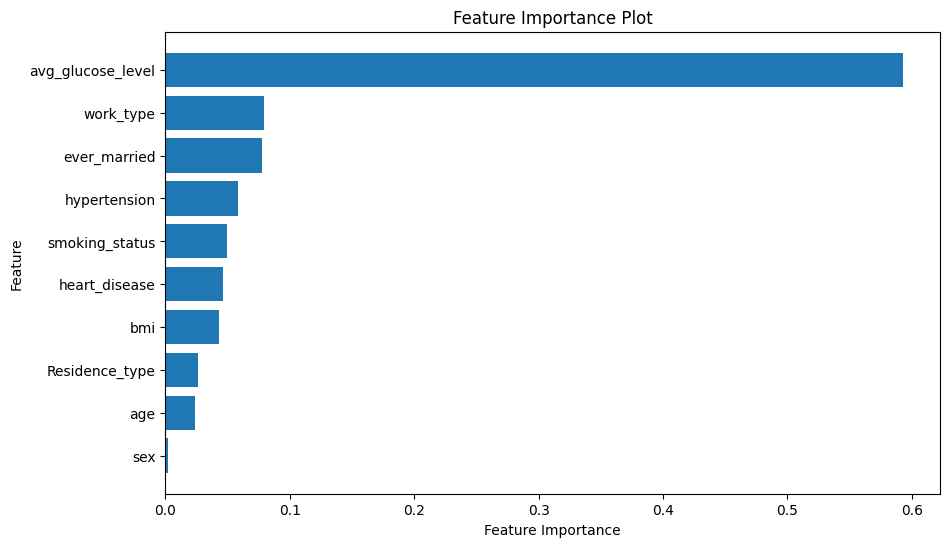

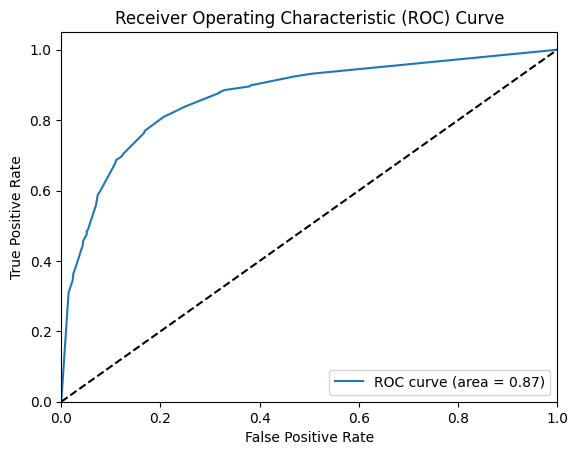

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8659559567081325
Accuracy for each fold: [0.8426573426573427, 0.8146853146853147, 0.8146853146853147, 0.7972027972027972, 0.8140350877192982, 0.7929824561403509, 0.7929824561403509, 0.7543859649122807, 0.8105263157894737, 0.8175438596491228]
Mean accuracy: 0.8051686909581646
95% confidence interval: (0.7886717504395406, 0.8216656314767885)


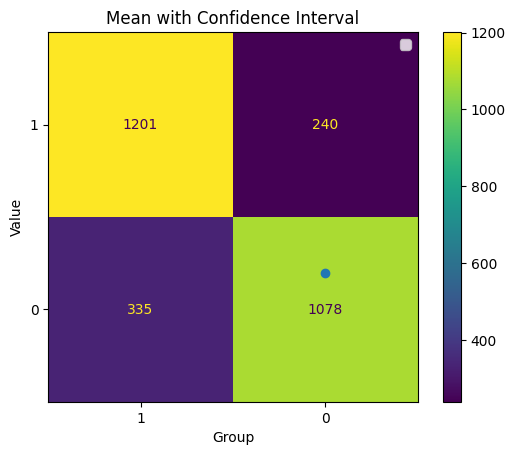


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1441
           1       0.65      0.75      0.70      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



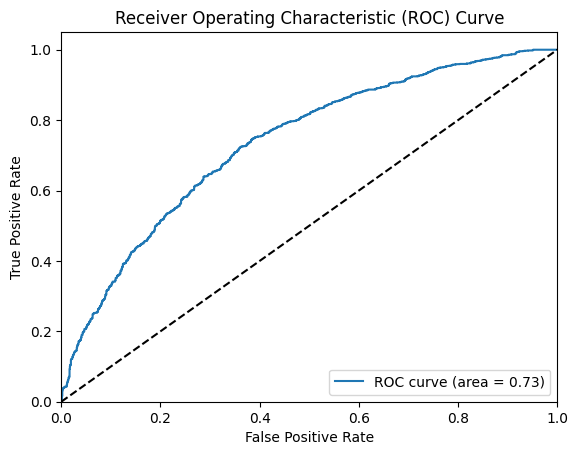

AUC Score: 0.7344579160595108


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6433566433566433, 0.6608391608391608, 0.6118881118881119, 0.6713286713286714, 0.656140350877193, 0.6807017543859649, 0.5894736842105263, 0.6842105263157895, 0.6807017543859649, 0.7263157894736842]
Mean accuracy: 0.6604956447061711
95% confidence interval: (0.6327405154552986, 0.6882507739570435)


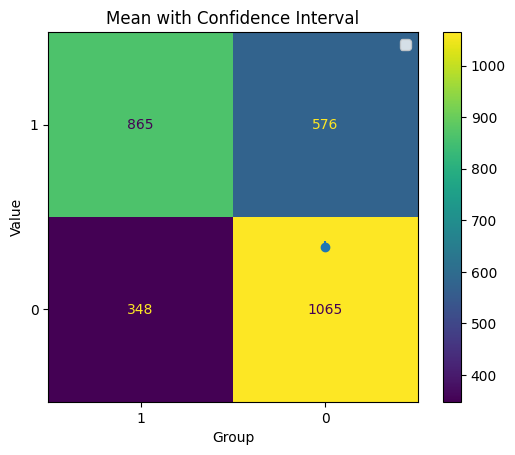

In [2]:
original_continuous_column = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['bmi'] = original_continuous_column

categorizing avg glucose level feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1441
           1       0.72      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.69      0.68      0.68      2854
weighted avg       0.69      0.68      0.68      2854

Node Labels:
 Annotation(0.492146, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


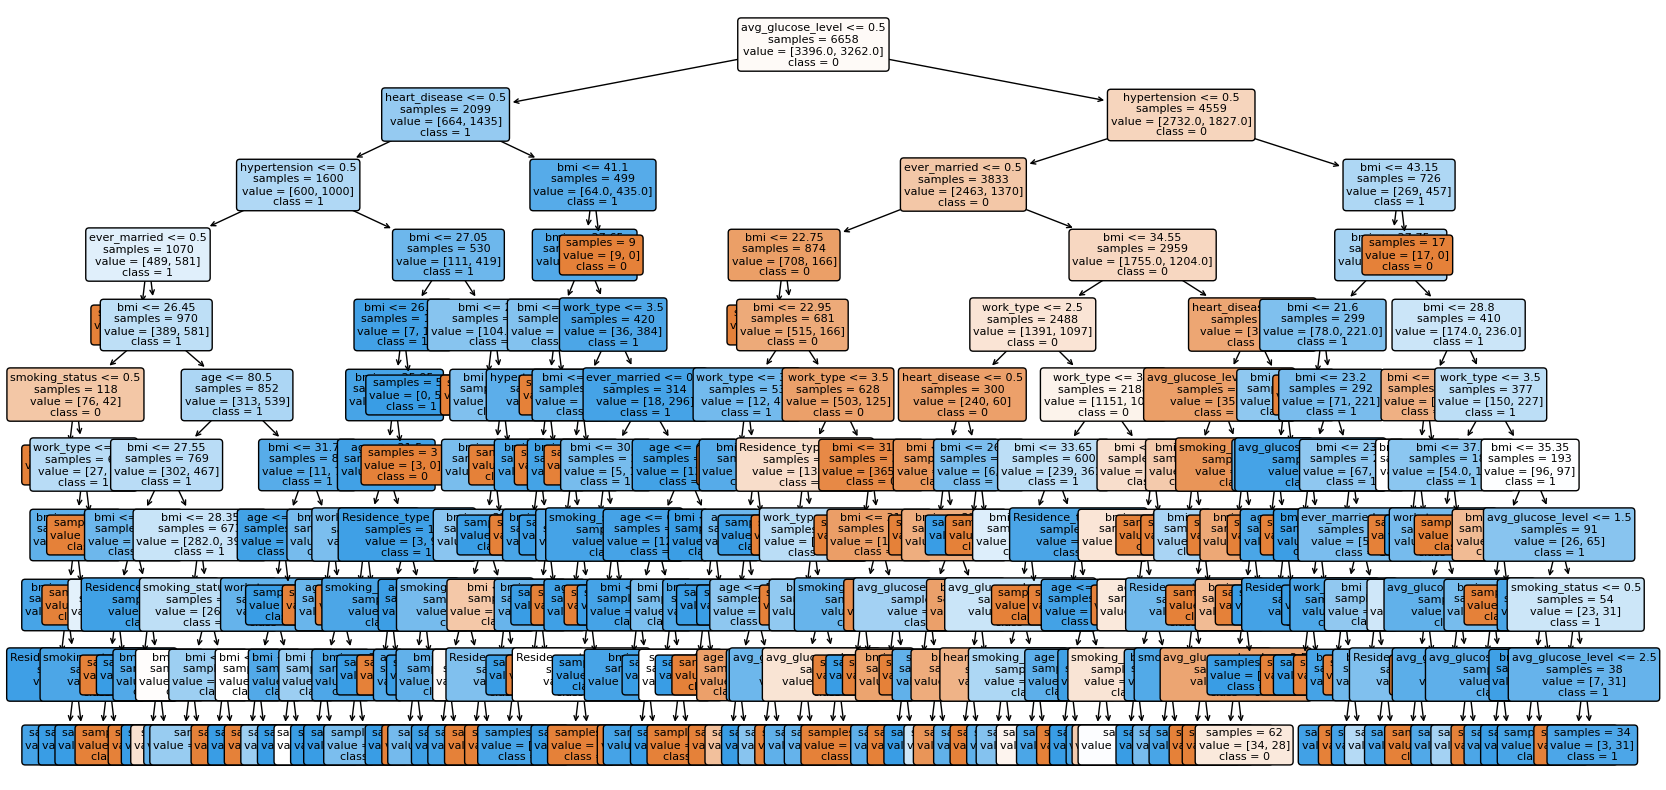

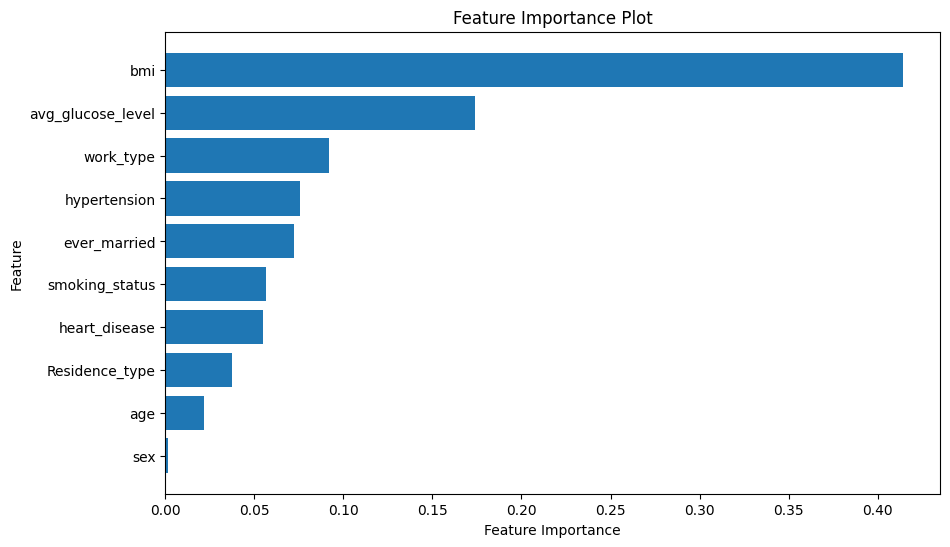

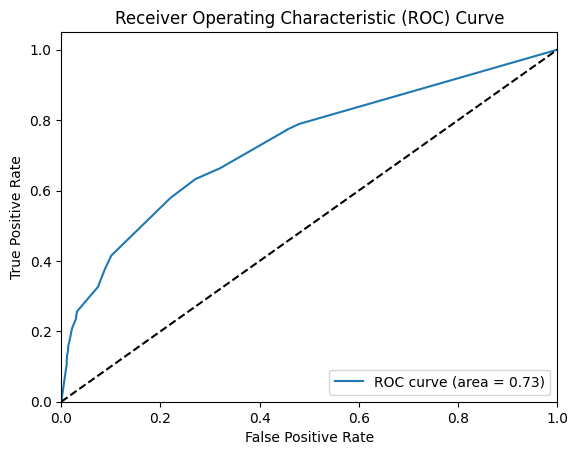

AUC Score: 0.7305254617453771


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8041958041958042, 0.8041958041958042, 0.8076923076923077, 0.8216783216783217, 0.7964912280701755, 0.8210526315789474, 0.8210526315789474, 0.8, 0.8035087719298246, 0.8140350877192982]
Mean accuracy: 0.809390258863943
95% confidence interval: (0.8026855737457497, 0.8160949439821363)


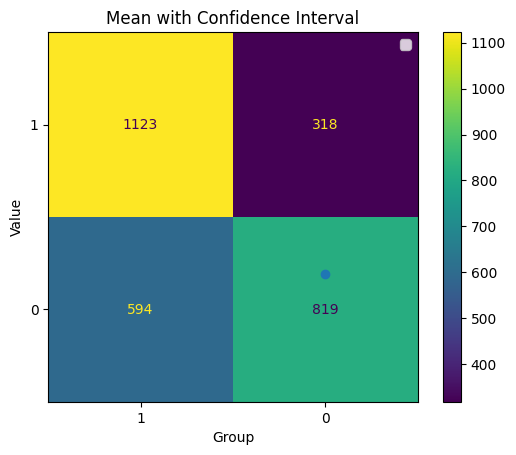


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



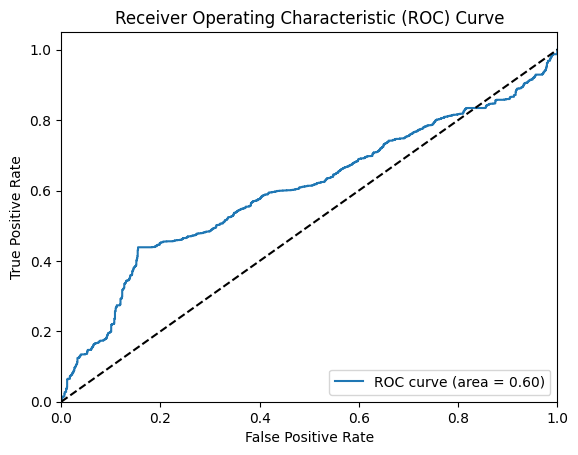

AUC Score: 0.6019425057204024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6748251748251748, 0.6573426573426573, 0.7237762237762237, 0.6748251748251748, 0.6596491228070176, 0.6280701754385964, 0.6350877192982456, 0.624561403508772, 0.6842105263157895, 0.6526315789473685]
Mean accuracy: 0.661497975708502
95% confidence interval: (0.6401326010543081, 0.6828633503626959)


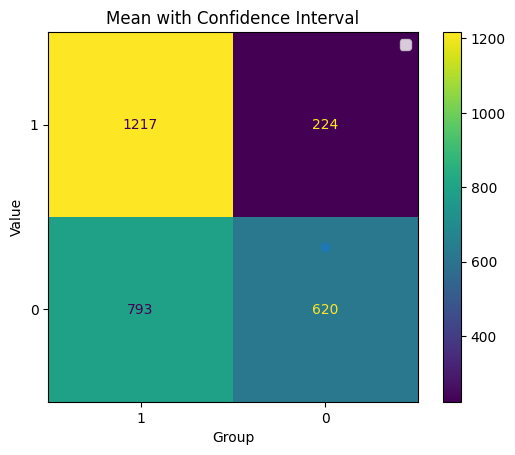

In [3]:
original_continuous_column = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column

categorizing bmi, age and avg_glucose_level features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.53      0.84      0.65      1441
           1       0.58      0.22      0.32      1413

    accuracy                           0.54      2854
   macro avg       0.56      0.53      0.49      2854
weighted avg       0.56      0.54      0.49      2854

Node Labels:
 Annotation(0.480646, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


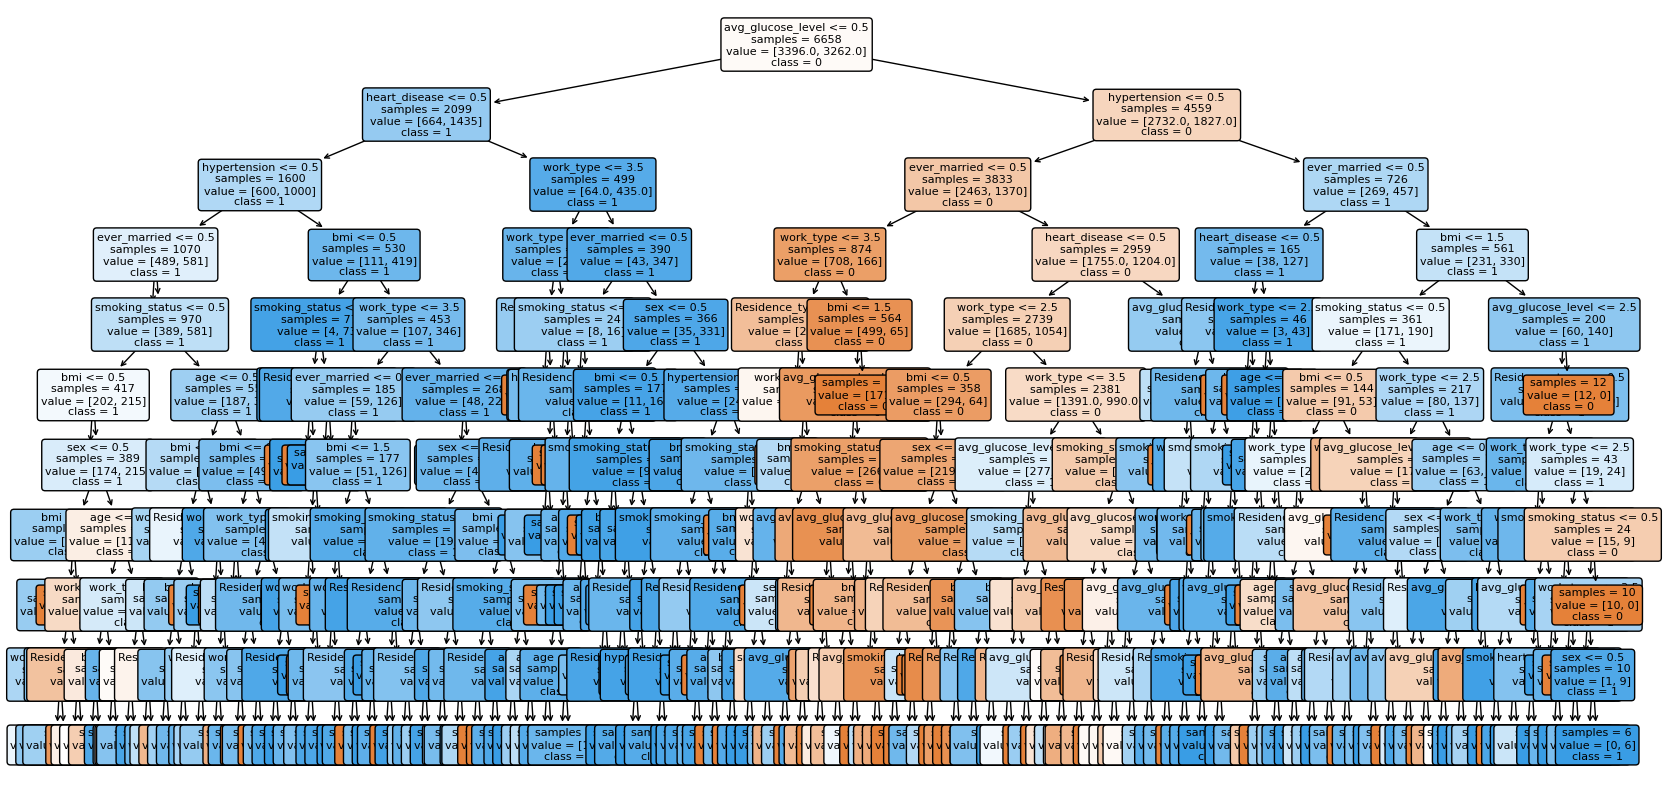

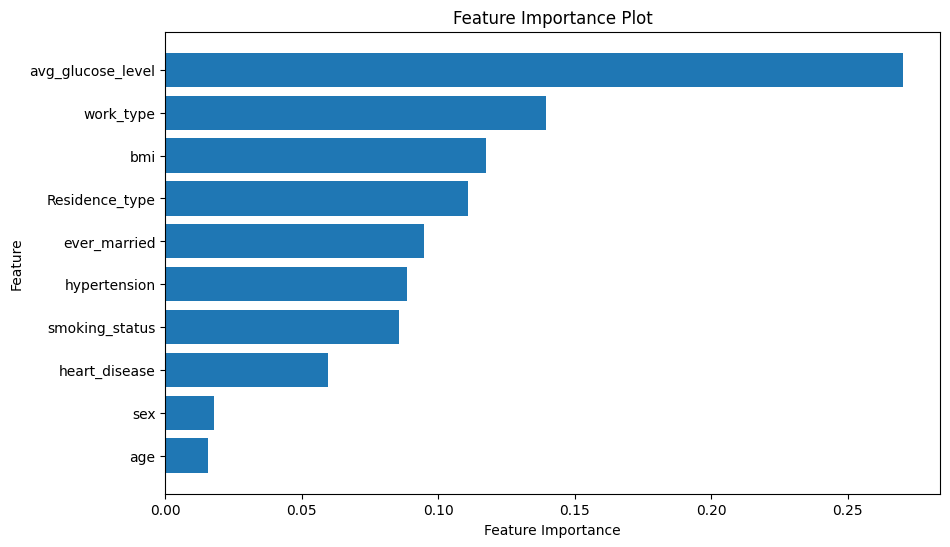

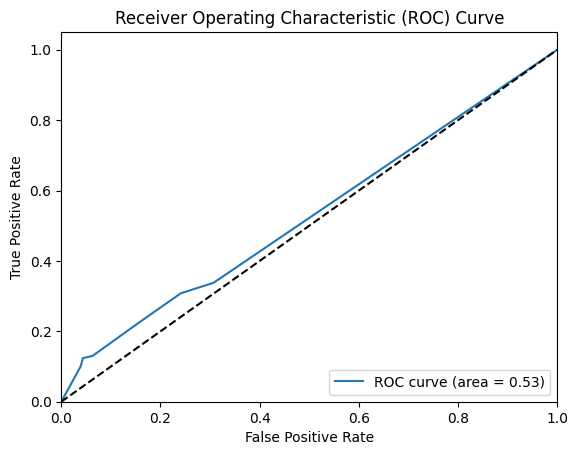

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.5288996347488106
Accuracy for each fold: [0.8076923076923077, 0.8216783216783217, 0.8321678321678322, 0.7902097902097902, 0.8070175438596491, 0.8210526315789474, 0.7789473684210526, 0.7859649122807018, 0.8245614035087719, 0.8280701754385965]
Mean accuracy: 0.8097362286835972
95% confidence interval: (0.7961723984177275, 0.8233000589494669)


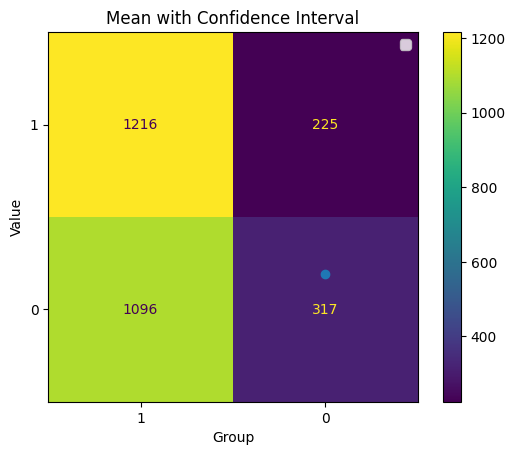


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



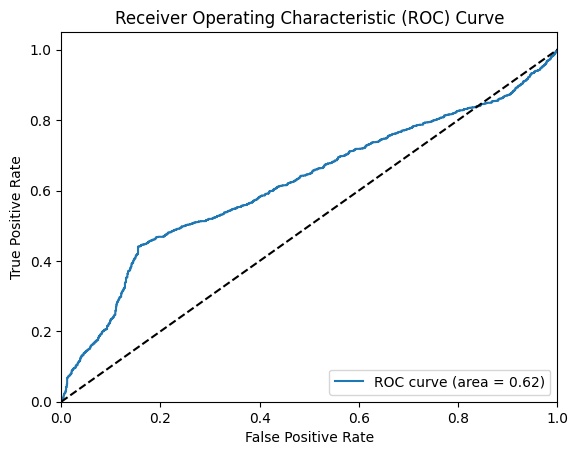

AUC Score: 0.618892773703879


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6608391608391608, 0.6538461538461539, 0.6328671328671329, 0.7132867132867133, 0.6035087719298246, 0.6280701754385964, 0.6736842105263158, 0.6842105263157895, 0.6421052631578947, 0.6877192982456141]
Mean accuracy: 0.6580137406453196
95% confidence interval: (0.6345924936801259, 0.6814349876105132)


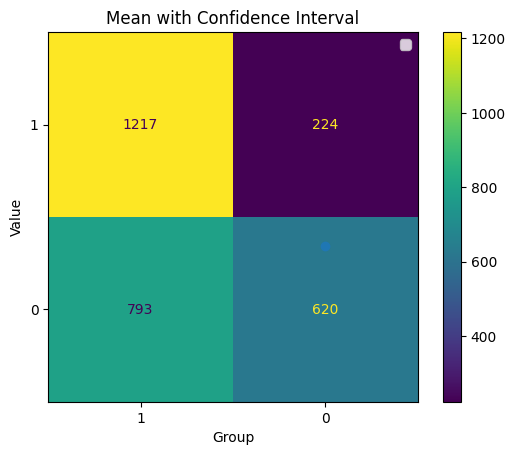

In [3]:
original_continuous_column_glucose = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

original_continuous_column_bmi = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')

original_continuous_column_age = df['age'].copy()
df = util_categorize.categorize_age(df)
df = util_categorize.label_encoding(df,'age')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)

print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column_glucose
df['bmi'] = original_continuous_column_bmi
df['age'] = original_continuous_column_age